In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Downloads/supermarket_sales - Sheet1.csv')

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [12]:
df.shape

(1000, 17)

# Data Validation

In [15]:
#Count of duplicate Invoice IDs
print(df.duplicated(subset=['Invoice ID']).sum())

0


In [17]:
#Transactions where total doesn't match
df['Calculated total']=df['Unit price']*df['Quantity']+df['Tax 5%']
discrepancies=df[df['Total']!=df['Calculated total']]
print(discrepancies)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
11   529-56-3974      B   Mandalay        Member    Male   
15   299-46-1805      B   Mandalay        Member  Female   
16   656-95-9349      A     Yangon        Member  Female   
..           ...    ...        ...           ...     ...   
983  148-41-7930      C  Naypyitaw        Normal    Male   
984  189-40-5216      C  Naypyitaw        Normal    Male   
989  430-53-4718      B   Mandalay        Member    Male   
993  690-01-6631      B   Mandalay        Normal    Male   
998  347-56-2442      A     Yangon        Normal    Male   

               Product line  Unit price  Quantity   Tax 5%     Total  \
0         Health and beauty       74.69         7  26.1415  548.9715   
1    Electronic accessories       15.28         5   3.8200   80.2200   
11   Electronic accessories       25.51         4   5.1020  107

In [19]:
#Verify the issue
df['difference']=df['Total']-df['Calculated total']
print(df['difference'].describe())

count    1.000000e+03
mean    -1.127987e-15
std      3.570618e-14
min     -1.136868e-13
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.136868e-13
Name: difference, dtype: float64


In [21]:
#These differences are insignificant and can be safely ignored for practical purposes. You can address this by rounding the values to a consistent number of decimal places.

In [23]:
#Round the columns
df['Total']=df['Total'].round(2)
df['Calculated total']=df['Calculated total'].round(2)

In [25]:
#Recheck for discrepancies
df['difference']=df['Total']-df['Calculated total']
discrepancies_remaining=df[df['difference']!=0]
print(f"Remaining discrepancies: {len(discrepancies_remaining)}")
print(discrepancies_remaining)

Remaining discrepancies: 17
      Invoice ID Branch       City Customer type  Gender  \
36   129-29-8530      A     Yangon        Member    Male   
79   756-01-7507      C  Naypyitaw        Normal  Female   
97   871-39-9221      C  Naypyitaw        Normal  Female   
133  590-83-4591      B   Mandalay        Member    Male   
220  239-36-3640      B   Mandalay        Normal    Male   
238  346-84-3103      B   Mandalay        Member  Female   
332  566-71-1091      A     Yangon        Normal    Male   
410  244-08-0162      B   Mandalay        Normal  Female   
444  301-11-9629      A     Yangon        Normal  Female   
476  485-30-8700      A     Yangon        Normal  Female   
486  709-58-4068      B   Mandalay        Normal  Female   
775  120-54-2248      B   Mandalay        Normal  Female   
836  288-62-1085      A     Yangon        Member    Male   
838  660-29-7083      C  Naypyitaw        Normal    Male   
850  843-73-4724      A     Yangon        Normal    Male   
880  490-95-

In [27]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Calculated total,difference
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.97,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.97,0.0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.22,0.0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.53,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.53,0.0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.05,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.05,0.0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.38,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.38,0.0


In [29]:
df['Tax 5%']=df['Tax 5%'].round(2)
df['gross margin percentage']=df['gross margin percentage'].round(2)
df['gross income']=df['gross income'].round(2)

In [31]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Calculated total,difference
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,4.76,26.14,9.1,548.97,0.0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,4.76,3.82,9.6,80.22,0.0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card,324.31,4.76,16.22,7.4,340.53,0.0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,4.76,23.29,8.4,489.05,0.0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,4.76,30.21,5.3,634.38,0.0


In [33]:
del df['difference']

In [35]:
del df['Calculated total']

# Exploratory Data Analysis (EDA)

In [38]:
print(df['Branch'].value_counts())
print(df['City'].value_counts())
print(df['Payment'].value_counts())

Branch
A    340
B    332
C    328
Name: count, dtype: int64
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


In [40]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379510,322.966820,307.58738,4.760000e+00,15.379510,6.97270
std,26.494628,2.923431,11.708842,245.885398,234.17651,1.208527e-13,11.708842,1.71858
min,10.080000,1.000000,0.510000,10.680000,10.17000,4.760000e+00,0.510000,4.00000
25%,32.875000,3.000000,5.927500,124.425000,118.49750,4.760000e+00,5.927500,5.50000
50%,55.230000,5.000000,12.090000,253.850000,241.76000,4.760000e+00,12.090000,7.00000
75%,77.935000,8.000000,22.445000,471.350000,448.90500,4.760000e+00,22.445000,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.760000e+00,49.650000,10.00000


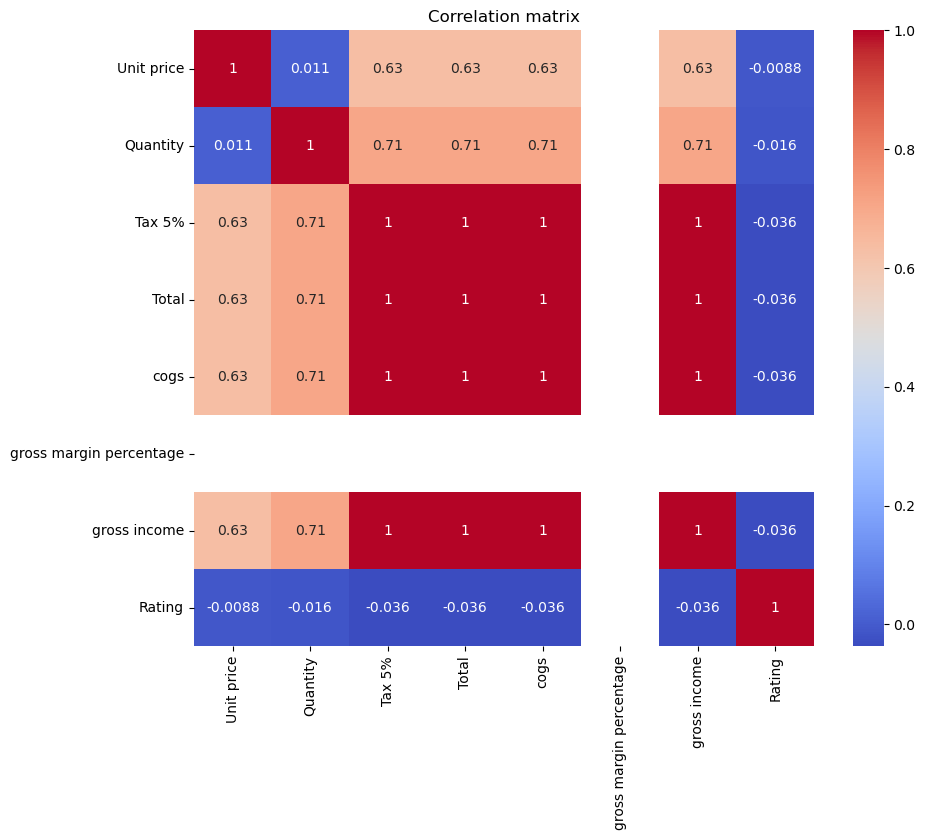

In [42]:
numeric_df=df.select_dtypes(include=['float64','int64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [46]:
#Since the gross margin percentage column is constant and does not contribute to the analysis
df=df.drop(columns=['gross margin percentage'])

In [48]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,26.14,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card,324.31,16.22,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,23.29,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,30.21,5.3


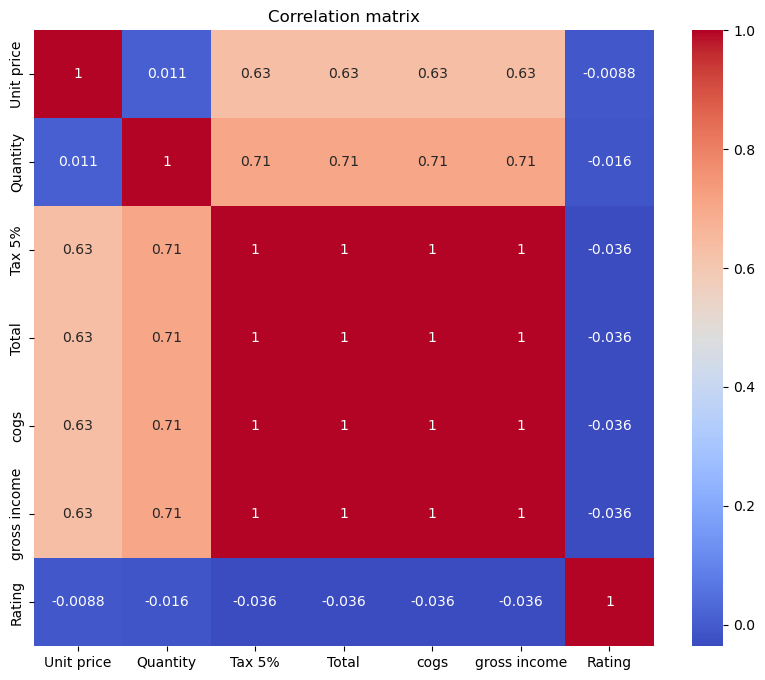

In [50]:
numeric_df=df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

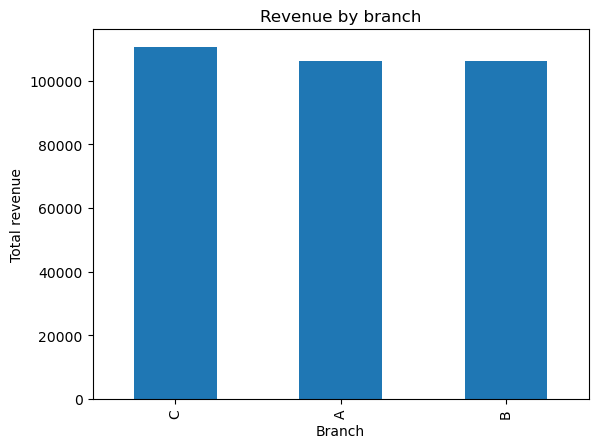

In [52]:
#Branch wise revenue
branch_revenue=df.groupby('Branch')['Total'].sum().sort_values(ascending=False)
branch_revenue.plot(kind='bar',title='Revenue by branch')
plt.ylabel('Total revenue')
plt.show()

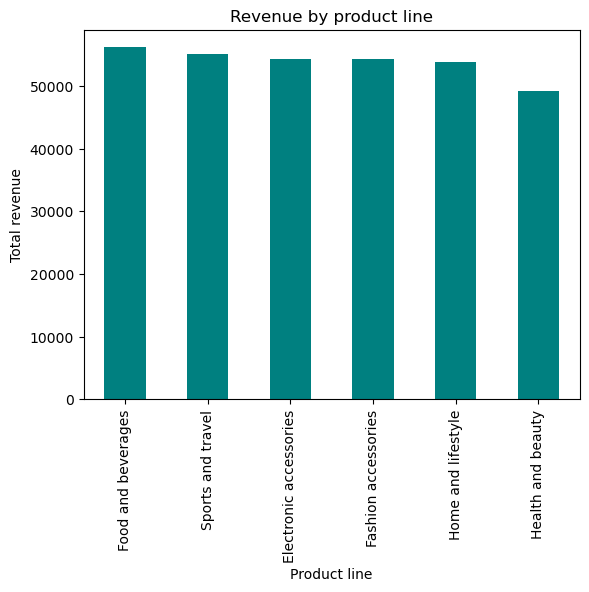

In [54]:
#sales by product line
product_revenue=df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
product_revenue.plot(kind='bar',title='Revenue by product line',color='teal')
plt.ylabel('Total revenue')
plt.show()

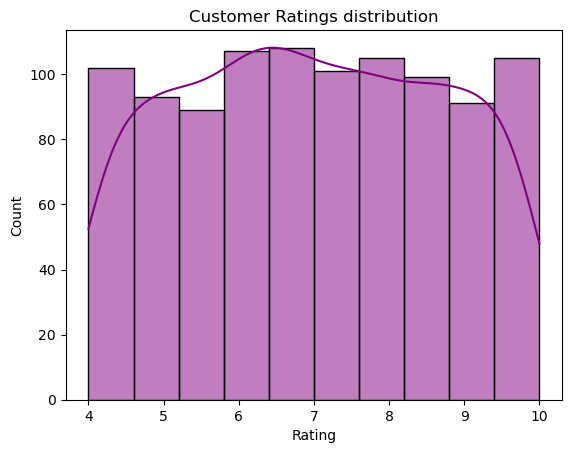

In [56]:
#Ratings distribution
sns.histplot(df['Rating'],kde=True,bins=10,color='purple')
plt.title('Customer Ratings distribution')
plt.xlabel('Rating')
plt.show()

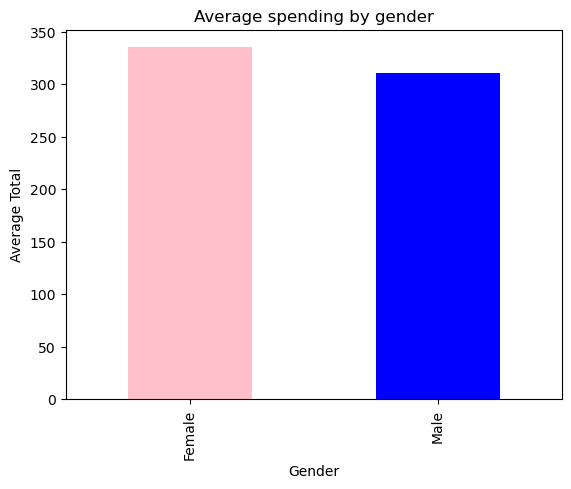

In [58]:
#Average spending by gender
avg_spending_gender=df.groupby('Gender')['Total'].mean()
avg_spending_gender.plot(kind='bar',title='Average spending by gender',color=['pink','blue'])
plt.ylabel('Average Total')
plt.show()

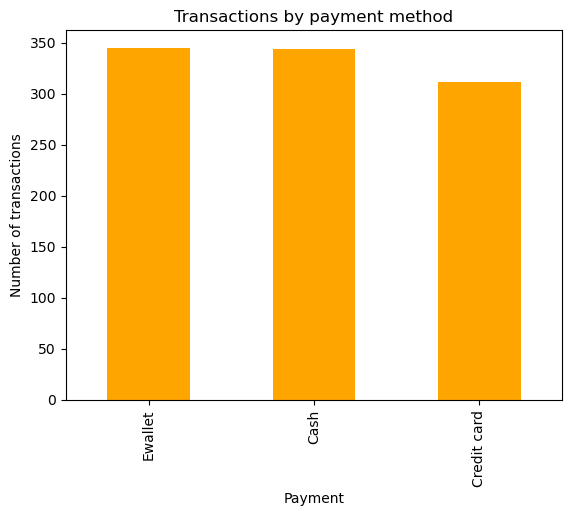

In [60]:
#Preferred payment method
payment_method_counts=df['Payment'].value_counts()
payment_method_counts.plot(kind='bar',title='Transactions by payment method',color='orange')
plt.ylabel('Number of transactions')
plt.show()

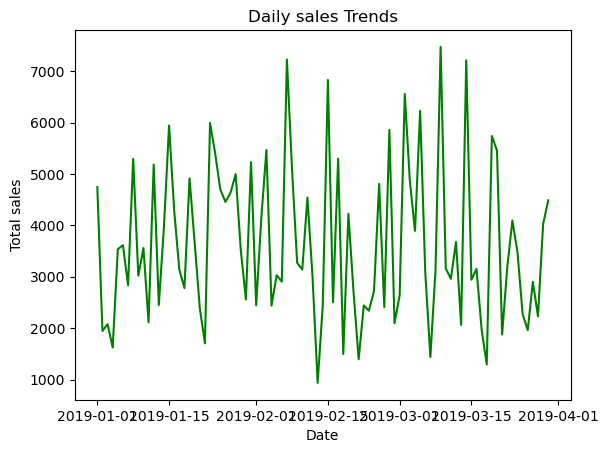

In [62]:
df['Date']=pd.to_datetime(df['Date'])
daily_sales=df.groupby(df['Date'].dt.date)['Total'].sum()
daily_sales.plot(title='Daily sales Trends',color='green')
plt.ylabel('Total sales')
plt.show()

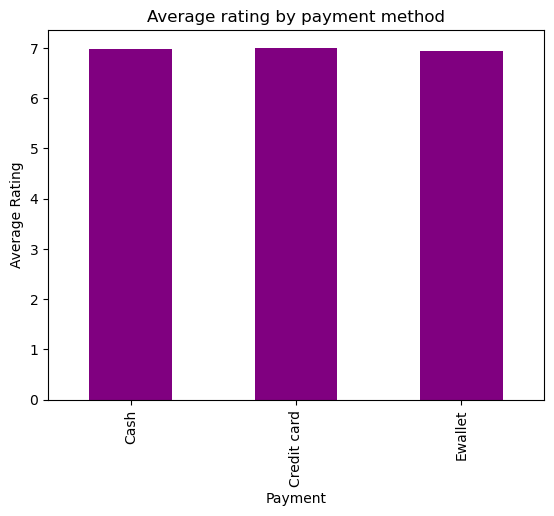

In [64]:
#Ratings by payment method
avg_rating_payment=df.groupby('Payment')['Rating'].mean()
avg_rating_payment.plot(kind='bar',title='Average rating by payment method',color='purple')
plt.ylabel('Average Rating')
plt.show()